Name : Akshat Sharma

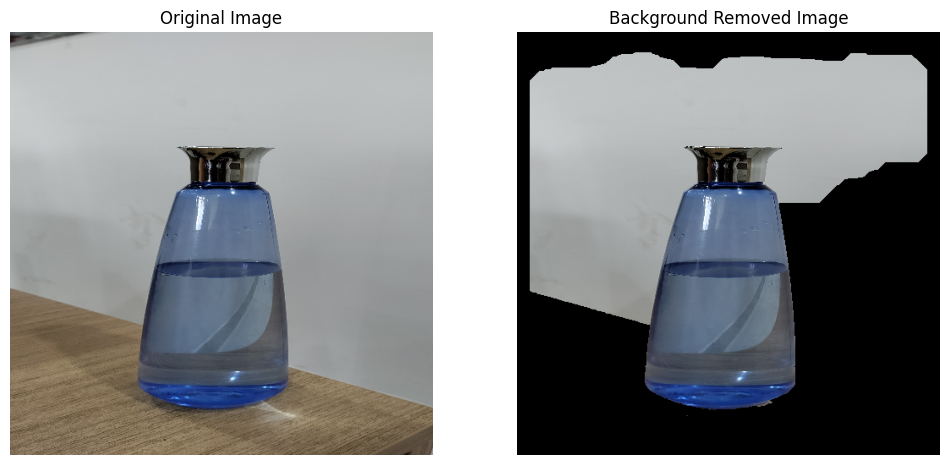

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and resize
image = cv2.imread("blue_bottle.jpg")
image = cv2.resize(image, (500, 500))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an initial mask
mask = np.zeros(image.shape[:2], dtype="uint8")

# Define model for background and foreground
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a rectangle around the foreground object
height, width = image.shape[:2]
rect = (15, 15, width - 30, height - 30)

# Apply grabCut
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask where 1 represents foreground and 0 represents background
mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply mask to keep only the foreground
foreground = image * mask_binary[:, :, np.newaxis]

# Convert to RGB for correct color display
foreground_rgb = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

# Display the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(foreground_rgb)
ax[1].set_title("Background Removed Image")
ax[1].axis("off")

plt.show()


TRIED CHANGING PARAMETERS AND IMAGE

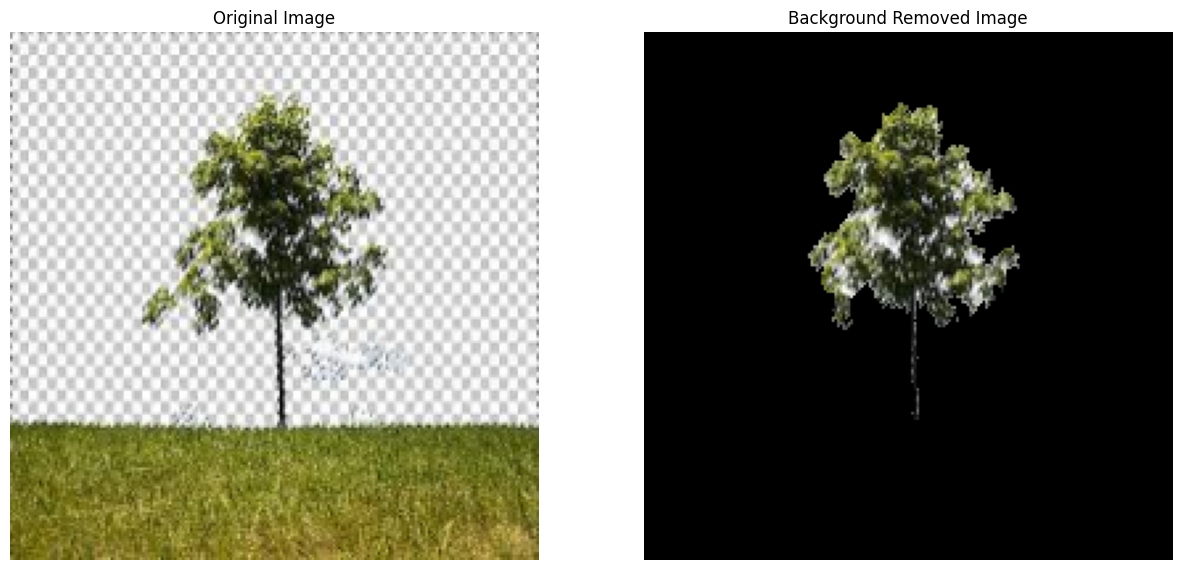

In [ ]:
#change image

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and resize
image = cv2.imread("nature.jpg")
image = cv2.resize(image, (200, 200))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an initial mask
mask = np.zeros(image.shape[:2], dtype="uint8")

# Define model for background and foreground
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a rectangle around the foreground object
height, width = image.shape[:2]
rect = (20,20, width - 30, height - 30)

# Apply grabCut
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask where 1 represents foreground and 0 represents background
mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply mask to keep only the foreground
foreground = image * mask_binary[:, :, np.newaxis]

# Convert to RGB for correct color display
foreground_rgb = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

# Display the result
fig, ax = plt.subplots(1, 2, figsize=(15,15))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(foreground_rgb)
ax[1].set_title("Background Removed Image")
ax[1].axis("off")

plt.show()

MIXTURE OF GAUSSIAN

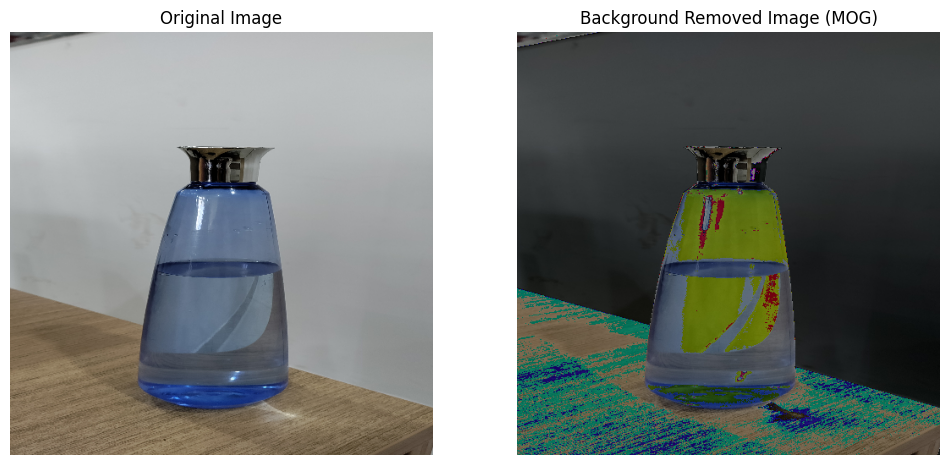

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and resize
image = cv2.imread("blue_bottle.jpg")

# Check if image is loaded correctly
if image is None:
    print("Error: Unable to load image. Check the file path or format.")
    exit()

# Resize the image to desired dimensions
image = cv2.resize(image, (500, 500))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a Background Subtractor using MOG2 (Mixture of Gaussians)
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

# Apply the background subtractor to get the foreground mask
mask = bg_subtractor.apply(image)

# Refine the mask using morphological operations to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Create a 3-channel mask to apply to the original image
mask_3channel = cv2.merge([mask, mask, mask])

# Apply the mask to extract the foreground
foreground = cv2.bitwise_and(image, mask_3channel)

# Convert the result to RGB for displaying with matplotlib
foreground_rgb = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

# Display the original and the extracted foreground side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(foreground_rgb)
ax[1].set_title("Background Removed Image (MOG)")
ax[1].axis("off")

plt.show()


Frame Detection Algorithm

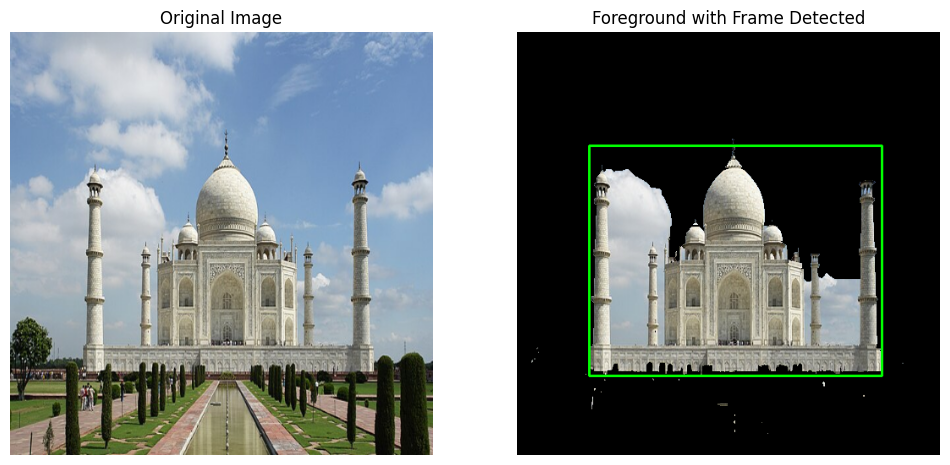

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and resize
image = cv2.imread("Taj.jpeg")
image = cv2.resize(image, (500, 500))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an initial mask
mask = np.zeros(image.shape[:2], dtype="uint8")

# Define model for background and foreground
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a rectangle around the foreground object
height, width = image.shape[:2]
rect = (15, 15, width - 30, height - 30)

# Apply grabCut to segment the foreground
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask where 1 represents foreground and 0 represents background
mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply mask to keep only the foreground
foreground = image * mask_binary[:, :, np.newaxis]

# Convert the binary mask to grayscale for contour detection
mask_gray = (mask_binary * 255).astype('uint8')

# Find contours in the binary mask
contours, _ = cv2.findContours(mask_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a bounding rectangle around the largest contour (foreground)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(foreground, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle with thickness 2

# Convert the result to RGB for correct color display
foreground_rgb = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

# Display the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(foreground_rgb)
ax[1].set_title("Foreground with Frame Detected")
ax[1].axis("off")

plt.show()


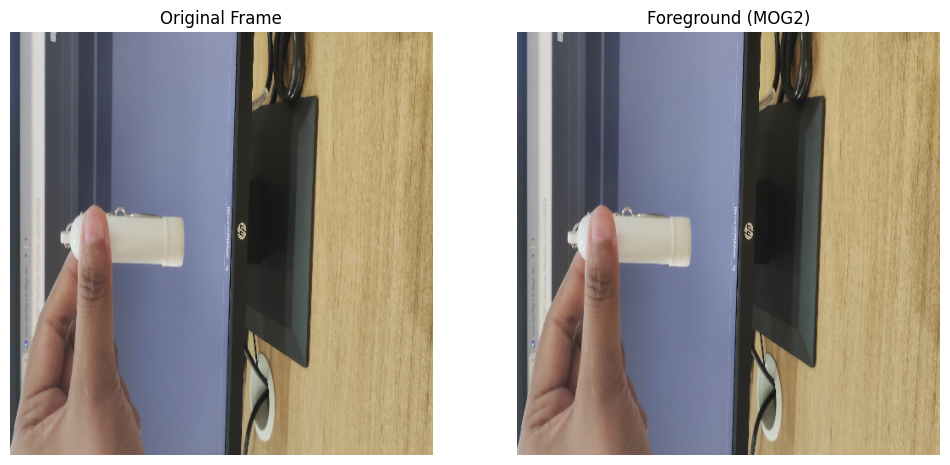

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the video stream (for example, a video file or webcam)
cap = cv2.VideoCapture("video.mp4")  # Replace with 0 for webcam (e.g., cap = cv2.VideoCapture(0))

# Check if video capture is successful
if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

# Create a figure for displaying results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create the MOG2 background subtractor object
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Break if no frame is read (end of video)

    # Resize the frame for faster processing (optional)
    frame_resized = cv2.resize(frame, (500, 500))

    # Convert the image to RGB for display with matplotlib
    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

    # Apply MOG2 background subtraction
    fgmask = fgbg.apply(frame_resized)

    # Apply the mask to the frame to extract the foreground
    foreground = cv2.bitwise_and(frame_resized, frame_resized, mask=fgmask)

    # Convert the foreground image to RGB for display
    foreground_rgb = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

    # Display the original and foreground images in real-time
    ax[0].imshow(frame_rgb)
    ax[0].set_title("Original Frame")
    ax[0].axis("off")

    ax[1].imshow(foreground_rgb)
    ax[1].set_title("Foreground (MOG2)")
    ax[1].axis("off")

    plt.draw()  # Update the figure
    plt.pause(0.01)  # Pause to allow the plot to update

    # Optional: Close the window if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close any windows
cap.release()
cv2.destroyAllWindows()